In [35]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [7]:
df = sns.load_dataset("titanic")
df.shape

(891, 15)

In [8]:
df.head(4)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False


In [10]:
df2 = df[['survived','pclass','age','parch']]
df2.head(4)

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0


In [13]:
df3 = df2.fillna(df2.mean())
x = df2.drop("survived", axis = 1)
y = df3["survived"]

print("\nShape of X: ", x.shape)
print("\nShape of Y: ", y.shape)


Shape of X:  (891, 3)

Shape of Y:  (891,)


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 51)

In [16]:
print("\nShape of x_train: ", x_train.shape)
print("\nShape of x_test: ", x_test.shape)
print("\nShape of y_train: ", y_train.shape )
print("\nShape of y_test: ", y_test.shape)


Shape of x_train:  (712, 3)

Shape of x_test:  (179, 3)

Shape of y_train:  (712,)

Shape of y_test:  (179,)


# Standardization of the Data 

### Using StandardScaler

In [19]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [20]:
sc.mean_

array([ 2.30617978, 29.51732394,  0.39185393])

In [21]:
sc.scale_

array([ 0.84405789, 14.54529745,  0.79647463])

In [23]:
x_train.describe()

,pclass,age,parch
count,712.000000,568.000000,712.000000
mean,2.306180,29.517324,0.391854
std,0.844651,14.558118,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,20.000000,0.000000
50%,3.000000,28.000000,0.000000
75%,3.000000,38.250000,0.000000
max,3.000000,71.000000,5.000000


In [24]:
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [25]:
x_train_sc = pd.DataFrame(x_train_sc, columns = ['pclass','age','parch'])
x_test_sc = pd.DataFrame(x_test_sc, columns = ['pclass','age','parch'])

In [28]:
x_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,568.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.00,-0.49
25%,-0.66,-0.65,-0.49
50%,0.82,-0.10,-0.49
75%,0.82,0.60,-0.49
max,0.82,2.85,5.79


### Using Min_Max Scaler

In [30]:
mmc = MinMaxScaler()
mmc.fit(x_train)

x_train_mmc = mmc.transform(x_train)
x_test_mmc = mmc.transform(x_test)

In [31]:
x_train_mmc = pd.DataFrame(x_train_mmc, columns = ['pclass','age','parch'])
x_test_mmc = pd.DataFrame(x_test_mmc, columns = ['pclass','age','parch'])

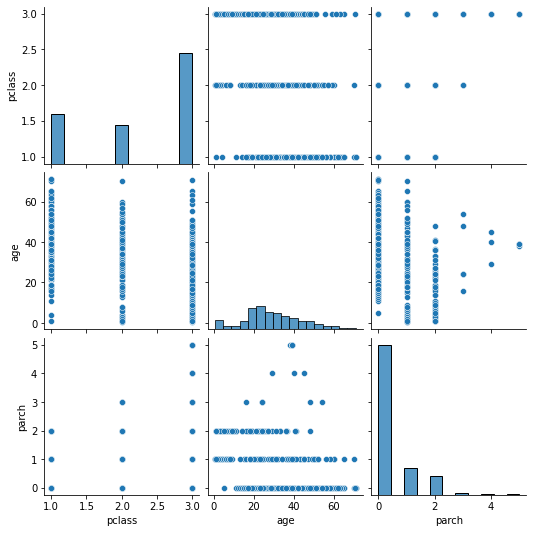

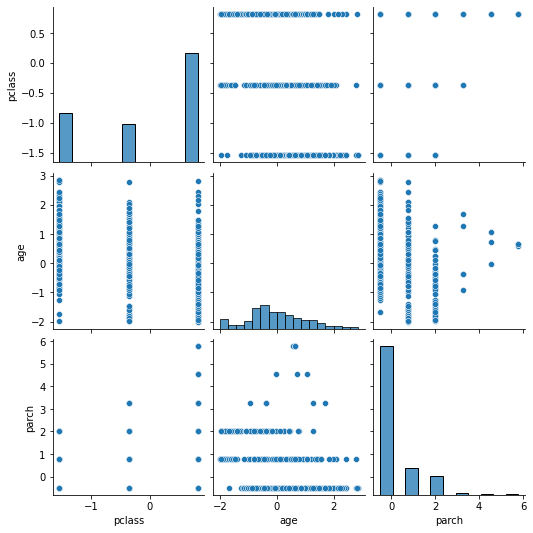

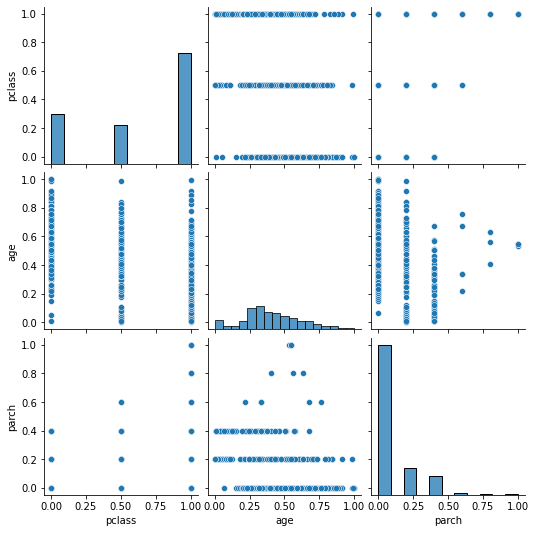

In [36]:
sns.pairplot(x_train)
sns.pairplot(x_train_sc)
sns.pairplot(x_train_mmc)
plt.show()